In [42]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models import LdaModel
from pathlib import Path
from gensim.corpora import Dictionary
from gensim.corpora import MmCorpus
import logging
import matplotlib.pyplot as plt
import numpy as np
import random

logging.basicConfig(level=logging.INFO)
LOG = logging.getLogger(__name__)
LOG.setLevel(logging.INFO)

In [15]:
in_model = Path('../models/full_04_01_2020/topic_models/gensim_topic_model400')
in_dict = Path('../models/full_04_01_2020/gensim_dct.mm')
in_corp = Path('../models/full_04_01_2020/gensim_corpus.mm')

In [17]:
lda = LdaModel.load(str(in_model))
dct = Dictionary.load(str(in_dict))
corpus = MmCorpus(str(in_corp))

In [18]:
cm = CoherenceModel(model=lda, dictionary=dct, corpus=corpus, coherence='u_mass')

In [26]:
ct = cm.get_coherence_per_topic()

INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 1000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 2000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 3000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 4000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 5000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 6000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 7000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 8000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 9000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 10000 documents
INFO:gensim.topic_c

In [61]:
cta = np.array(ct)

In [64]:
scta = (-cta).argsort()

In [73]:
[(lda.id2word[i], v) for i, v in lda.get_topic_terms(scta[8])]

[('ion', 0.054740492),
 ('star', 0.024786111),
 ('line', 0.018997056),
 ('lat', 0.01865134),
 ('high', 0.015682673),
 ('galaxi', 0.013335347),
 ('te', 0.012713349),
 ('mode', 0.012640839),
 ('system', 0.012606029),
 ('tec', 0.012578158)]

In [80]:
corpus_slice = random.choices(corpus, k=10_000)

In [81]:
lda.log_perplexity(corpus_slice)

INFO:gensim.models.ldamodel:-24.746 per-word bound, 28129719.1 perplexity estimate based on a held-out corpus of 10000 documents with 164042 words


-24.745591812616876

(array([ 8.,  4., 13., 14., 46., 45., 69., 78., 57., 66.]),
 array([-4.71301083, -4.37075468, -4.02849852, -3.68624237, -3.34398621,
        -3.00173006, -2.6594739 , -2.31721774, -1.97496159, -1.63270543,
        -1.29044928]),
 <a list of 10 Patch objects>)

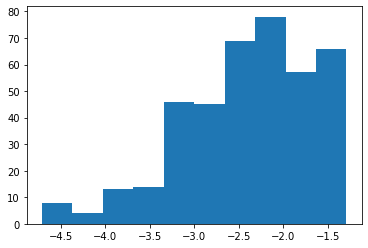

In [82]:
plt.hist(ct)